In [1]:
import numpy as np
import matplotlib.pyplot as plt

def compute_friction(velocity, g0, g1, g2, g3, g4, g5, saturation):
    tanh1v = np.tanh(g1 * velocity)
    tanh2v = np.tanh(g2 * velocity)
    tanh4v = np.tanh(g4 * velocity)

    friction_torque = 0.0
    friction_torque += g0 * tanh1v
    friction_torque -= g0 * tanh2v
    friction_torque += g3 * tanh4v
    friction_torque += g5 * velocity

    friction_torque = np.clip(friction_torque, -saturation, saturation)
    return friction_torque


In [2]:
velocity = np.linspace(-5.0, 5.0, 1000)  # rad/s

In [3]:
g0 = 0.0
g1 = 0.0
g2 = 0.0
g3 = 25
g4 = 10.073
g5 = 1.23
saturation = 100

In [4]:
b0 = 0.0
b1 = 0.0
b2 = 0.0
b3=  27
b4 = 10.073
b5 = 1.23 

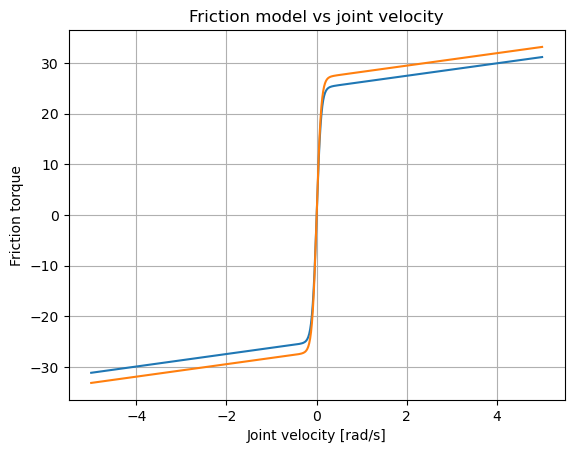

In [5]:
friction1 = compute_friction(velocity, g0, g1, g2, g3, g4, g5, saturation)
friction2 = compute_friction(velocity, b0, b1, b2, b3, b4, b5, saturation)
plt.figure()
plt.plot(velocity, friction1)
plt.plot(velocity, friction2)
plt.xlabel("Joint velocity [rad/s]")
plt.ylabel("Friction torque")
plt.title("Friction model vs joint velocity")
plt.grid(True)
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def compute_friction(velocity, g0, g1, g2, g3, g4, g5, saturation):
    tanh1v = np.tanh(g1 * velocity)
    tanh2v = np.tanh(g2 * velocity)
    tanh4v = np.tanh(g4 * velocity)

    friction_torque = 0.0
    friction_torque += g0 * tanh1v
    friction_torque -= g0 * tanh2v
    friction_torque += g3 * tanh4v
    friction_torque += g5 * velocity

    friction_torque = np.clip(friction_torque, -saturation, saturation)
    return friction_torque

# velocity grid (edit as you like)
velocity = np.linspace(-1, 1, 800)

g0 = -24.0;
g1 = -92.0;
g2 = 8.3;
g3 = -42;
g4 = 13;
g5 = 1.8;

@interact(

    # Model 2 params
    b0=widgets.FloatSlider(value=-51.0, min=-100.0, max=100.0, step=0.1, description='b0'),
    b1=widgets.FloatSlider(value=-51.0, min=-100.0, max=100.0, step=0.1, description='b1'),
    b2=widgets.FloatSlider(value=2.0, min=-100.0, max=100.0, step=0.1, description='b2'),
    b3=widgets.FloatSlider(value=25.0, min=-100.0, max=100.0, step=0.5, description='b3'),
    b4=widgets.FloatSlider(value=1.0, min=-100.0, max=50.0, step=0.1, description='b4'),
    b5=widgets.FloatSlider(value=0.0, min=-20.0, max=20.0, step=0.01, description='b5'),

    saturation=widgets.FloatSlider(value=50.0, min=0.0, max=200.0, step=1.0, description='sat'),
)
def plot_friction(b0, b1, b2, b3, b4, b5, saturation):
    f1 = compute_friction(velocity, g0, g1, g2, g3, g4, g5, saturation)
    f2 = compute_friction(velocity, b0, b1, b2, b3, b4, b5, saturation)

    plt.figure(figsize=(7,4))
    plt.plot(velocity, f1, label="friction1")
    plt.plot(velocity, f2, label="friction2")
    plt.xlabel("Joint velocity [rad/s]")
    plt.ylabel("Friction torque")
    plt.title("Friction model vs joint velocity")
    plt.grid(True)
    plt.legend()
    plt.show()


interactive(children=(FloatSlider(value=-51.0, description='b0', min=-100.0), FloatSlider(value=-51.0, descrip…